#### Task Preprocessing

Prepare the dataset by applying an appropriate normalization method to the variables. <br>
Should you normalize the outcome variable? <br>
Should you use the same method for all variables or decide for each variable individually?

#### Task PCA

1) Perform PCA on all input variables.
2) Use a screeplot and the elbow method to decide how many PCs should be included in further analysis. How much variance is explained by the chosen PCs?
3) Interprete the eigenvectors/loadings of the 2 PCs with the highest eigenvalue. Use a visualization method for explanation.
4) Split the dataset by "Outcome". Perform PCA for both subsets. Are there clearly visible differences in the PCs? What does that mean?

In [3]:
#1 Perform PCA on all input variables.
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Laden der Daten
df_self = pd.read_pickle("../data/df_imputed_clean.pkl")

# Entfernen von nicht relevanten Spalten
df1 = df_self.drop(columns=['Mahalanobis_Distance', 'Multivariate_Outlier', 'Outlier'])

# Spalten für z-Skalierung (Standardisierung)
z_columns = ['Glucose', 'BMI', 'BloodPressure']

# Spalten für 0-1 Normalisierung (Min-Max)
minmax_columns = ['Pregnancies','Age','SkinThickness','Insulin','DiabetesPedigreeFunction']

# Standardisierung (z-Skalierung)
scaler_z = StandardScaler()
df_z_scaled = pd.DataFrame(scaler_z.fit_transform(df1[z_columns]), columns=z_columns)

# Min-Max-Normalisierung (0-1 Skalierung)
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df1[minmax_columns]), columns=minmax_columns)

# Kombinieren der normalisierten DataFrames
df1_scaled = pd.concat([df_z_scaled, df_minmax_scaled], axis=1)

# PCA durchführen
pca = PCA()
principal_components = pca.fit_transform(df1_scaled)

# Umwandeln in DataFrame
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
df_pca = pd.DataFrame(principal_components, columns=pca_columns)

# Erklärung der Varianz durch jede Hauptkomponente
explained_variance = pca.explained_variance_ratio_

# Ergebnisse ausgeben
df_pca.head(), explained_variance

(        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0  0.631577  0.660118 -0.314191  0.251623  0.081182  0.062381  0.116053   
 1 -1.466410 -0.421948  0.349947 -0.064142 -0.030337  0.109818  0.097797   
 2 -0.038012  2.587027 -0.141899  0.112938  0.100153  0.036352 -0.205737   
 3 -1.277672 -0.427449  0.185881 -0.186228 -0.137813 -0.009637 -0.011524   
 4 -0.593931  0.385991  0.749133 -0.009090 -0.123132 -0.057873 -0.078756   
 
         PC8  
 0 -0.057587  
 1 -0.069247  
 2 -0.095693  
 3  0.021126  
 4 -0.005270  ,
 array([0.48098918, 0.25494607, 0.22589361, 0.01633739, 0.00844   ,
        0.00483242, 0.0046499 , 0.00391143]))

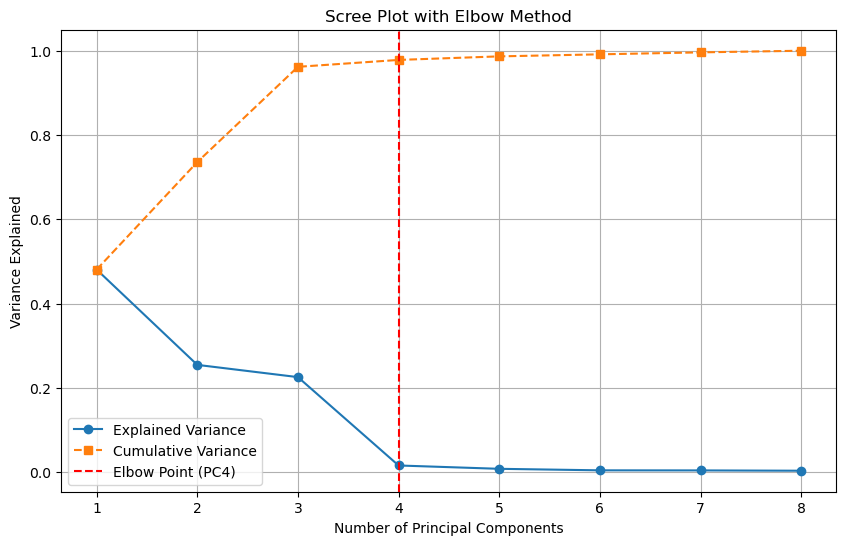

Optimal number of PCs: 4
Total explained variance by selected PCs: 0.98


In [4]:
#2 Use a screeplot and the elbow method to decide how many PCs should be included in further analysis. 
# How much variance is explained by the chosen PCs?
import matplotlib.pyplot as plt
import numpy as np

# Berechnung der kumulierten Varianz
cumulative_variance = np.cumsum(explained_variance)

# Screeplot erstellen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', linestyle='--', label='Cumulative Variance')

# Elbow-Punkt bestimmen (heuristische Methode: erster Punkt, an dem der Anstieg stark abnimmt)
elbow_point = np.argmax(np.diff(cumulative_variance) < 0.01) + 1
plt.axvline(elbow_point, color='r', linestyle='--', label=f'Elbow Point (PC{elbow_point})')

# Achsenbeschriftung und Titel
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot with Elbow Method')
plt.legend()
plt.grid(True)

# Plot anzeigen
plt.show()

# Gesamte erklärte Varianz der gewählten Hauptkomponenten
total_explained_variance = cumulative_variance[elbow_point - 1]
print(f'Optimal number of PCs: {elbow_point}')
print(f'Total explained variance by selected PCs: {total_explained_variance:.2f}')

<Figure size 1200x600 with 0 Axes>

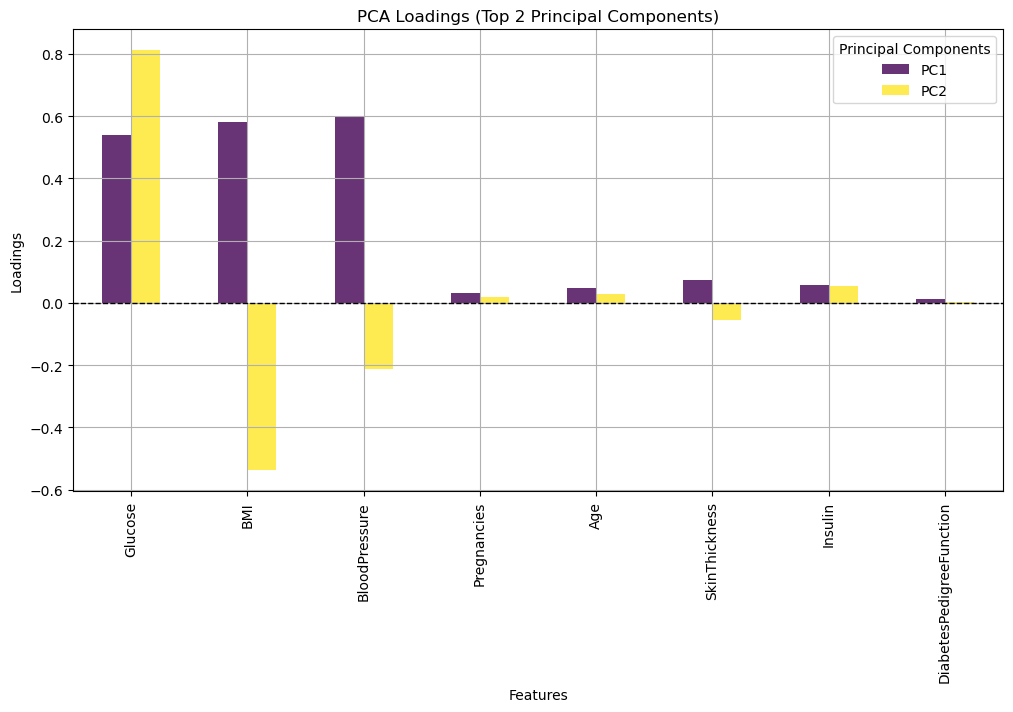

Top contributing features for PC1: ['BloodPressure', 'BMI', 'Glucose']
Top contributing features for PC2: ['Glucose', 'BMI', 'BloodPressure']


In [8]:
# 3) Interprete the eigenvectors/loadings of the 2 PCs with the highest eigenvalue. 
# Use a visualization method for explanation.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Eigenvektoren (Ladungen) extrahieren
loadings = pca.components_[:2]  # Erste zwei Hauptkomponenten

# DataFrame für Visualisierung erstellen
loadings_df = pd.DataFrame(loadings.T, index=df1_scaled.columns, columns=['PC1', 'PC2'])

# Balkendiagramm für die ersten beiden Hauptkomponenten
plt.figure(figsize=(12, 6))
loadings_df.plot(kind='bar', figsize=(12, 6), cmap='viridis', alpha=0.8)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('PCA Loadings (Top 2 Principal Components)')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.legend(title='Principal Components')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Interpretation: Höchste absolute Werte in jeder Komponente
top_features_pc1 = loadings_df['PC1'].abs().nlargest(3).index.tolist()
top_features_pc2 = loadings_df['PC2'].abs().nlargest(3).index.tolist()

print(f'Top contributing features for PC1: {top_features_pc1}')
print(f'Top contributing features for PC2: {top_features_pc2}')

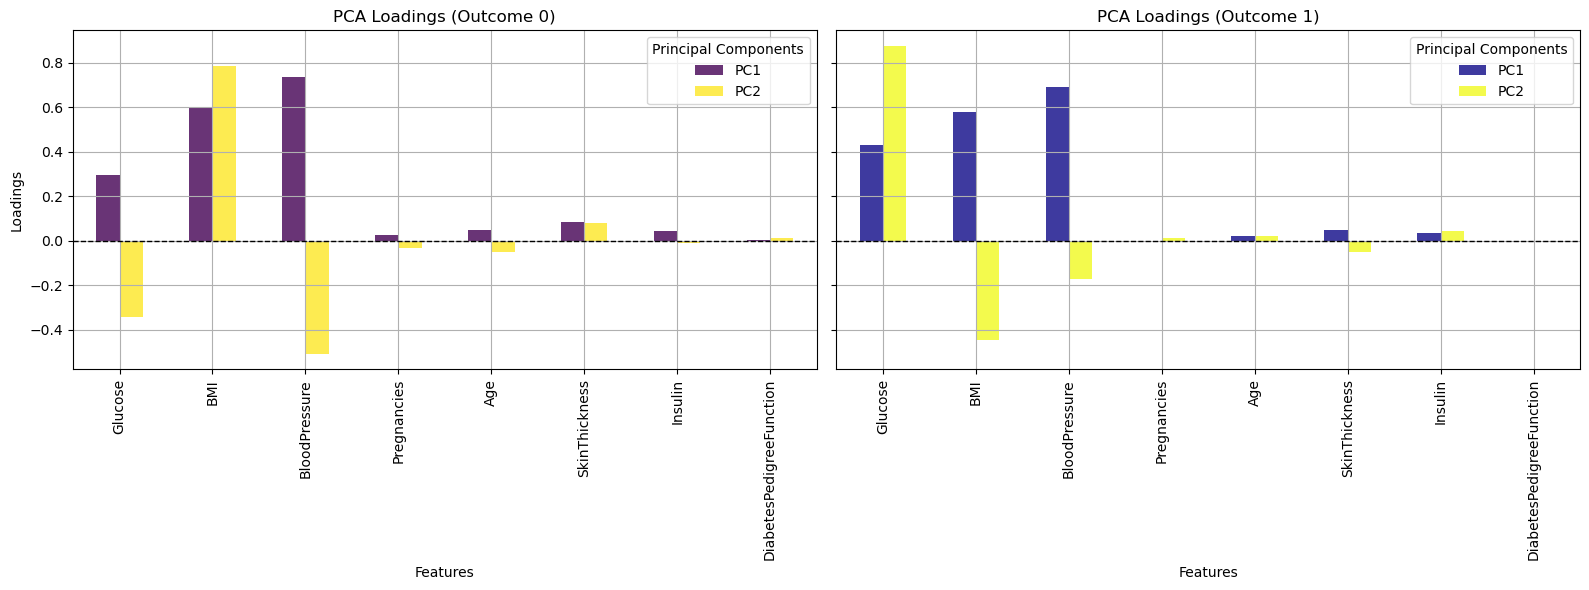

Top contributing features for PC1 (Outcome 0): ['BloodPressure', 'BMI', 'Glucose']
Top contributing features for PC2 (Outcome 0): ['BMI', 'BloodPressure', 'Glucose']
Top contributing features for PC1 (Outcome 1): ['BloodPressure', 'BMI', 'Glucose']
Top contributing features for PC2 (Outcome 1): ['Glucose', 'BMI', 'BloodPressure']


In [23]:
# aufgeteilt nach Outcome 0 und Outcome 1
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Datensatz nach Outcome aufteilen
outcome_0 = df1_scaled[df_self['Outcome'] == 0]
outcome_1 = df1_scaled[df_self['Outcome'] == 1]

# PCA für beide Gruppen durchführen
pca_0 = PCA(n_components=2)
pca_1 = PCA(n_components=2)
pca_0.fit(outcome_0)
pca_1.fit(outcome_1)

# Eigenvektoren (Ladungen) extrahieren
loadings_0 = pca_0.components_  # Für Outcome 0
loadings_1 = pca_1.components_  # Für Outcome 1

# DataFrames für Visualisierung erstellen
loadings_df_0 = pd.DataFrame(loadings_0.T, index=df1_scaled.columns, columns=['PC1', 'PC2'])
loadings_df_1 = pd.DataFrame(loadings_1.T, index=df1_scaled.columns, columns=['PC1', 'PC2'])

# Balkendiagramm für beide Gruppen
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

loadings_df_0.plot(kind='bar', ax=axes[0], cmap='viridis', alpha=0.8)
axes[0].axhline(0, color='black', linestyle='--', linewidth=1)
axes[0].set_title('PCA Loadings (Outcome 0)')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Loadings')
axes[0].legend(title='Principal Components')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(True)

loadings_df_1.plot(kind='bar', ax=axes[1], cmap='plasma', alpha=0.8)
axes[1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1].set_title('PCA Loadings (Outcome 1)')
axes[1].set_xlabel('Features')
axes[1].legend(title='Principal Components')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Interpretation: Höchste absolute Werte in jeder Komponente
for outcome, loadings_df in zip([0, 1], [loadings_df_0, loadings_df_1]):
    top_features_pc1 = loadings_df['PC1'].abs().nlargest(3).index.tolist()
    top_features_pc2 = loadings_df['PC2'].abs().nlargest(3).index.tolist()
    print(f'Top contributing features for PC1 (Outcome {outcome}): {top_features_pc1}')
    print(f'Top contributing features for PC2 (Outcome {outcome}): {top_features_pc2}')

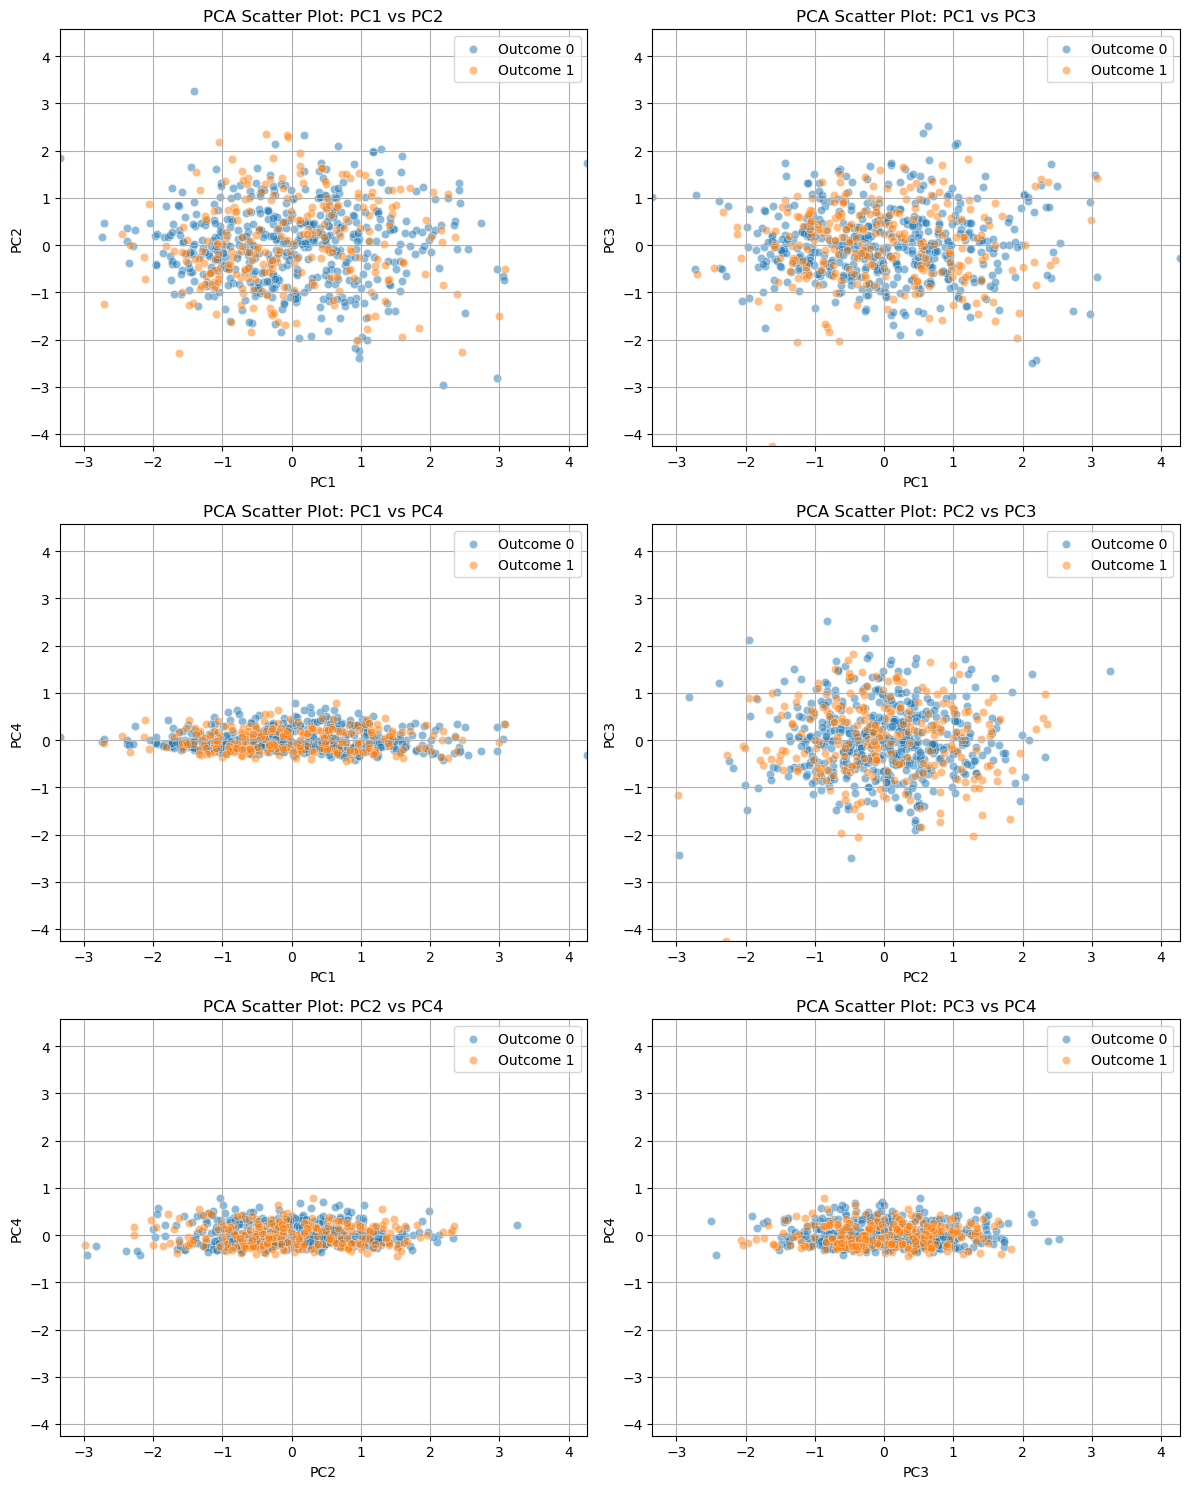

Explained variance (Outcome 0): [0.4708974  0.273765   0.21468061 0.01825387]
Explained variance (Outcome 1): [0.41050718 0.31496386 0.23042188 0.01733577]


In [21]:
# 4) Split the dataset by "Outcome". Perform PCA for both subsets. 
# Are there clearly visible differences in the PCs? What does that mean?
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Datensatz nach 'Outcome' aufteilen
outcome_0 = df1_scaled[df_self['Outcome'] == 0]
outcome_1 = df1_scaled[df_self['Outcome'] == 1]

# PCA für beide Teilmengen durchführen
pca_0 = PCA(n_components=4)
pca_1 = PCA(n_components=4)
principal_components_0 = pca_0.fit_transform(outcome_0)
principal_components_1 = pca_1.fit_transform(outcome_1)

# Umwandlung in DataFrame
df_pca_0 = pd.DataFrame(principal_components_0, columns=[f'PC{i+1}' for i in range(principal_components_0.shape[1])])
df_pca_1 = pd.DataFrame(principal_components_1, columns=[f'PC{i+1}' for i in range(principal_components_1.shape[1])])

# Alle möglichen Kombinationen von PCs für Scatterplots
pc_combinations = list(itertools.combinations([f'PC{i+1}' for i in range(4)], 2))

# Einheitliche Achsenskalierung bestimmen
x_min = df_pca_0.min().min()
x_max = df_pca_0.max().max()
y_min = df_pca_1.min().min()
y_max = df_pca_1.max().max()

# Anzahl der Kombinationen
num_plots = len(pc_combinations)
cols = 2  # Anzahl der Spalten für die nebeneinander liegenden Plots
rows = (num_plots + cols - 1) // cols  # Berechnung der benötigten Zeilen

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

# Erstellen separater Scatterplots für jede Kombination
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    sns.scatterplot(ax=axes[i], x=df_pca_0[pc_x], y=df_pca_0[pc_y], label='Outcome 0', alpha=0.5)
    sns.scatterplot(ax=axes[i], x=df_pca_1[pc_x], y=df_pca_1[pc_y], label='Outcome 1', alpha=0.5)
    axes[i].set_xlabel(pc_x)
    axes[i].set_ylabel(pc_y)
    axes[i].set_title(f'PCA Scatter Plot: {pc_x} vs {pc_y}')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)

# Falls es leere Plots gibt, diese ausblenden
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Vergleich der erklärten Varianz
explained_variance_0 = pca_0.explained_variance_ratio_
explained_variance_1 = pca_1.explained_variance_ratio_

print("Explained variance (Outcome 0):", explained_variance_0[:5])
print("Explained variance (Outcome 1):", explained_variance_1[:5])

### **Interpretation der PCA Scatterplots (Outcome 0 vs Outcome 1)**

#### **1️⃣ Allgemeine Beobachtungen**
- Die **blauen Punkte** repräsentieren **Outcome 0** (kein Diabetes).
- Die **orangen Punkte** repräsentieren **Outcome 1** (Diabetes).
- Jeder Scatterplot zeigt eine **zweidimensionale Darstellung** der Daten in den ersten vier Hauptkomponenten (PC1-PC4).
- Die Punkte sind in allen Plots **stark überlappend**, was darauf hindeutet, dass keine klare lineare Trennung zwischen den Outcomes besteht.

---

#### **2️⃣ Analyse der verschiedenen PCA-Paare**
📊 **PC1 vs PC2 (links oben)**  
- PC1 zeigt eine leichte Spreizung, aber die Gruppen überlappen stark.  
- Keine klare Cluster-Bildung, d. h., **PC1 und PC2 allein trennen Outcome 0 und 1 nicht deutlich**.

📊 **PC1 vs PC3 (rechts oben)**  
- Ähnlich wie PC1 vs PC2: Die Verteilung der Punkte ist dicht und es gibt keine offensichtlichen Cluster.

📊 **PC1 vs PC4 (links mittig)**  
- PC4 hat eine viel kleinere Streuung (kleine Werte auf der y-Achse).  
- Das zeigt, dass **PC4 nicht so viel zur Unterscheidung beiträgt**.

📊 **PC2 vs PC3 (rechts mittig)**  
- Wieder eine dichte Verteilung mit **kaum erkennbaren Gruppen**.

📊 **PC2 vs PC4 (links unten)**  
- Starke Überlappung → **keine klare Trennung zwischen Outcome 0 und 1**.

📊 **PC3 vs PC4 (rechts unten)**  
- Sehr starke Überlappung → **keine Trennung sichtbar**.

---

#### **3️⃣ Fazit: Gibt es Unterschiede zwischen den Outcomes?**
🚫 **Es gibt keine klare Trennung zwischen Outcome 0 und Outcome 1 in den PCA-Scatterplots.**  
- Die Punkte sind **gleichmäßig gemischt**, was darauf hindeutet, dass **die ersten vier PCs nicht stark genug sind, um eine eindeutige Trennung zwischen den beiden Gruppen zu ermöglichen**.
- Das bedeutet, dass eine **lineare Dimensionsreduktion (PCA) allein möglicherweise nicht ausreicht**, um die Daten gut zu trennen.
- **Alternative Methoden wie t-SNE oder UMAP könnten eine bessere Differenzierung ermöglichen.**  

✅ **Nächste Schritte:**  
1. **Weitere PCs einbeziehen** (prüfen, ob PC5+ eine bessere Trennung ermöglicht).  
2. **Nicht-lineare Methoden (z. B. t-SNE, UMAP) testen**.  
3. **Feature Engineering:** Neue Variablen aus den bestehenden Daten erstellen, um bessere Muster zu finden.  

Soll ich eine t-SNE- oder UMAP-Visualisierung für dich generieren? 😊

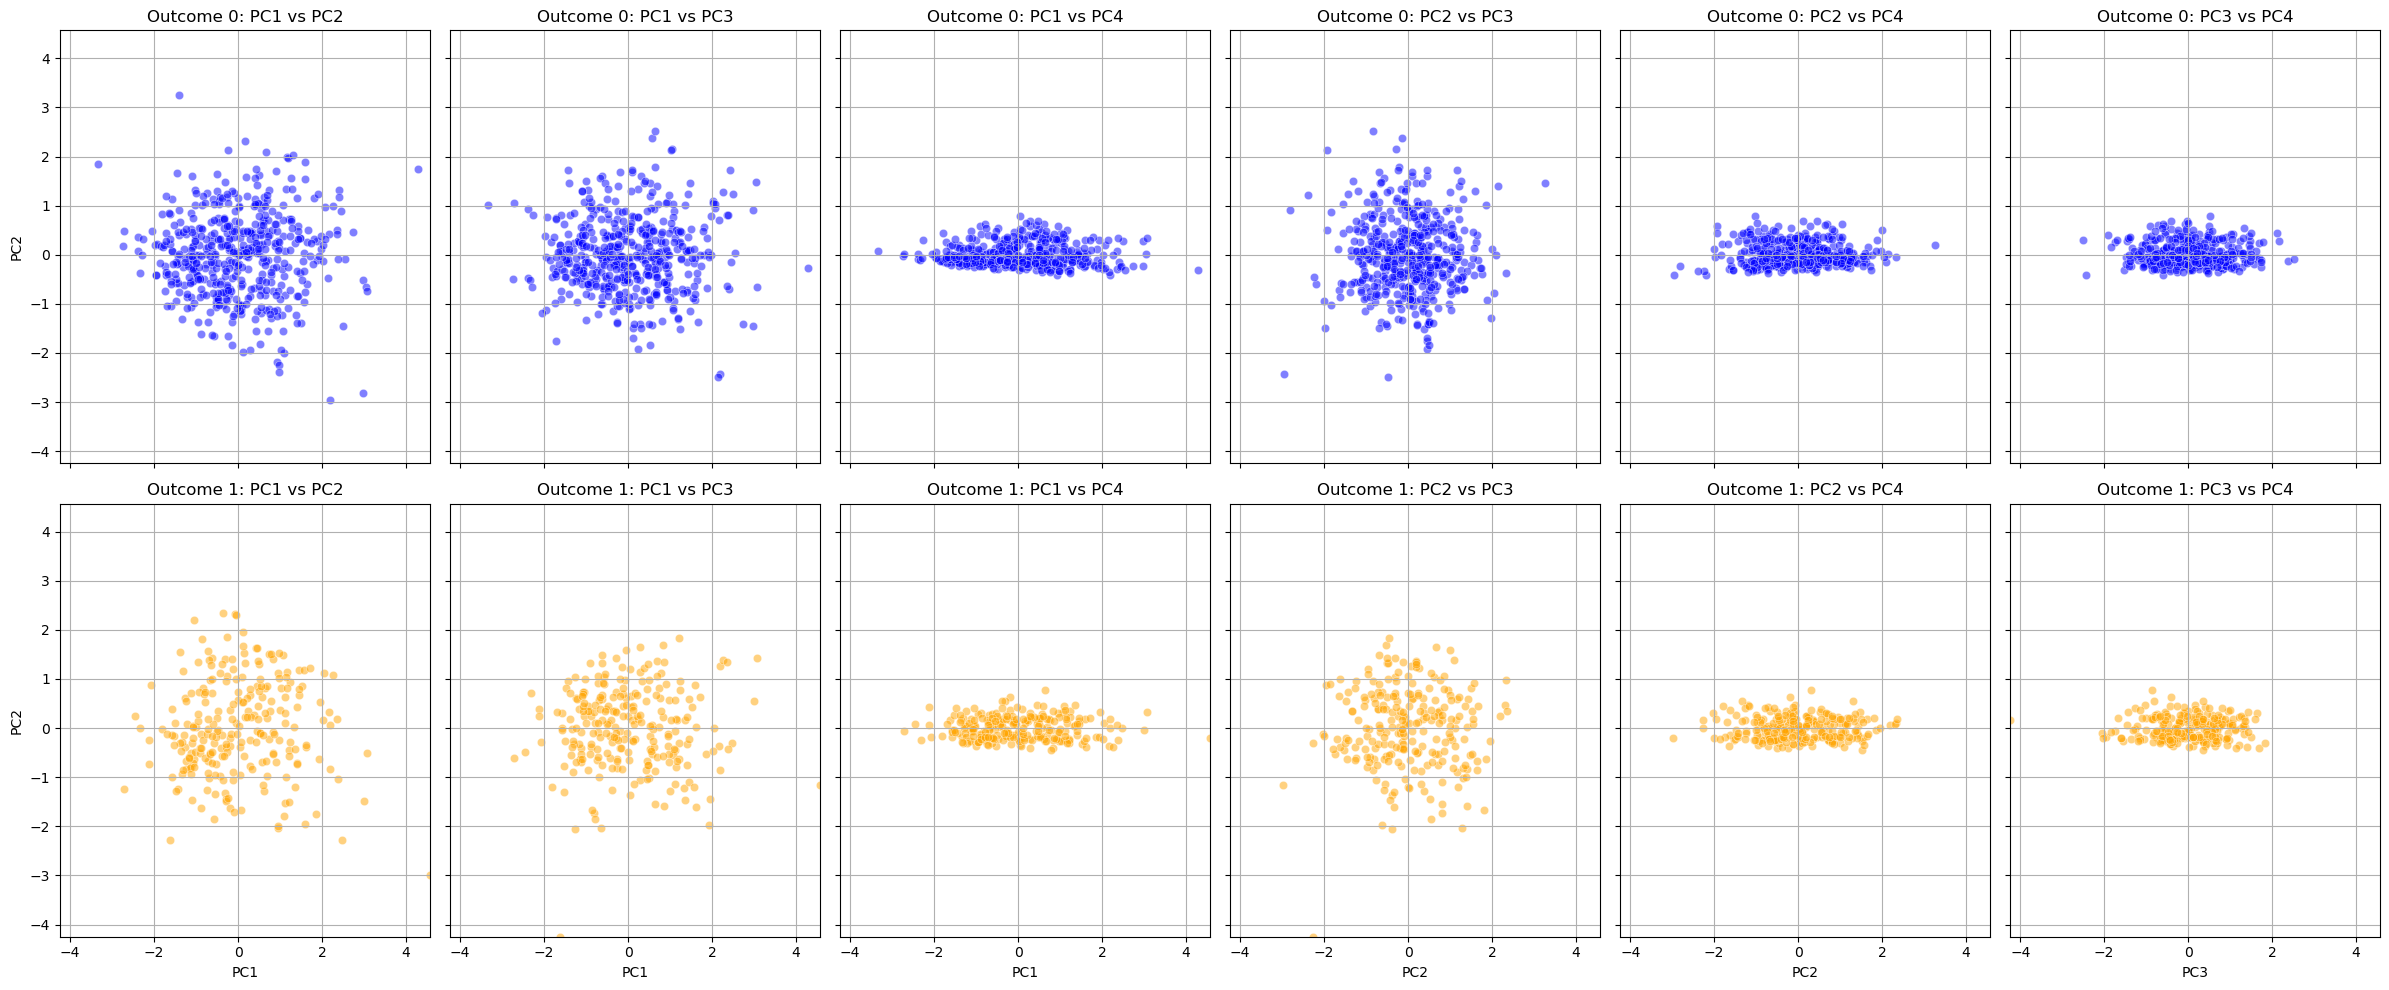

Explained variance (Outcome 0): [0.4708974  0.273765   0.21468061 0.01825387]
Explained variance (Outcome 1): [0.41050718 0.31496386 0.23042188 0.01733577]


In [24]:
# Aufteilung nach Outcome = 0 und Outcome = 1

import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Datensatz nach 'Outcome' aufteilen
outcome_0 = df1_scaled[df_self['Outcome'] == 0]
outcome_1 = df1_scaled[df_self['Outcome'] == 1]

# PCA für beide Teilmengen durchführen
pca_0 = PCA(n_components=4)
pca_1 = PCA(n_components=4)
principal_components_0 = pca_0.fit_transform(outcome_0)
principal_components_1 = pca_1.fit_transform(outcome_1)

# Umwandlung in DataFrame
df_pca_0 = pd.DataFrame(principal_components_0, columns=[f'PC{i+1}' for i in range(principal_components_0.shape[1])])
df_pca_1 = pd.DataFrame(principal_components_1, columns=[f'PC{i+1}' for i in range(principal_components_1.shape[1])])

# Alle möglichen Kombinationen von PCs für Scatterplots
pc_combinations = list(itertools.combinations([f'PC{i+1}' for i in range(4)], 2))

# Visualisierung der PCA-Ergebnisse mit nebeneinanderliegenden Plots
fig, axes = plt.subplots(2, len(pc_combinations), figsize=(4 * len(pc_combinations), 10), sharex=True, sharey=True)

# Einheitliche Achsenskalierung bestimmen
x_min = min(df_pca_0.min().min(), df_pca_1.min().min())
x_max = max(df_pca_0.max().max(), df_pca_1.max().max())
y_min = x_min  # symmetrische Skalierung
y_max = x_max

# Erstellen der Scatterplots
for i, (pc_x, pc_y) in enumerate(pc_combinations):
    # Plot für Outcome 0
    sns.scatterplot(ax=axes[0, i], x=df_pca_0[pc_x], y=df_pca_0[pc_y], alpha=0.5, color='blue')
    axes[0, i].set_title(f'Outcome 0: {pc_x} vs {pc_y}')
    axes[0, i].set_xlim(x_min, x_max)
    axes[0, i].set_ylim(y_min, y_max)
    axes[0, i].grid(True)
    
    # Plot für Outcome 1
    sns.scatterplot(ax=axes[1, i], x=df_pca_1[pc_x], y=df_pca_1[pc_y], alpha=0.5, color='orange')
    axes[1, i].set_title(f'Outcome 1: {pc_x} vs {pc_y}')
    axes[1, i].set_xlim(x_min, x_max)
    axes[1, i].set_ylim(y_min, y_max)
    axes[1, i].grid(True)

plt.tight_layout()
plt.show()

# Vergleich der erklärten Varianz
explained_variance_0 = pca_0.explained_variance_ratio_
explained_variance_1 = pca_1.explained_variance_ratio_

print("Explained variance (Outcome 0):", explained_variance_0[:5])
print("Explained variance (Outcome 1):", explained_variance_1[:5])


#### Task K-Means Clustering

Perform the following tasks for the original (but normalized) variables and the PCA/dimension-reduced dataset. Compare how the resulst diverge.
1) Perform K-Means with k=[1:10] clusters. Calculate Sum of Squared Errors and Silhouette Score for each clustering iteration. Visualize the Goodness of Fit for each k as scree plots. Use the Elbow Method to find the optimal number of clusters. Is it the same for both Goodness of Fit methods?
2) Create a brief descriptive overview of the clusters. 
3) Compare if the clusters align with the outcome.

c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:14

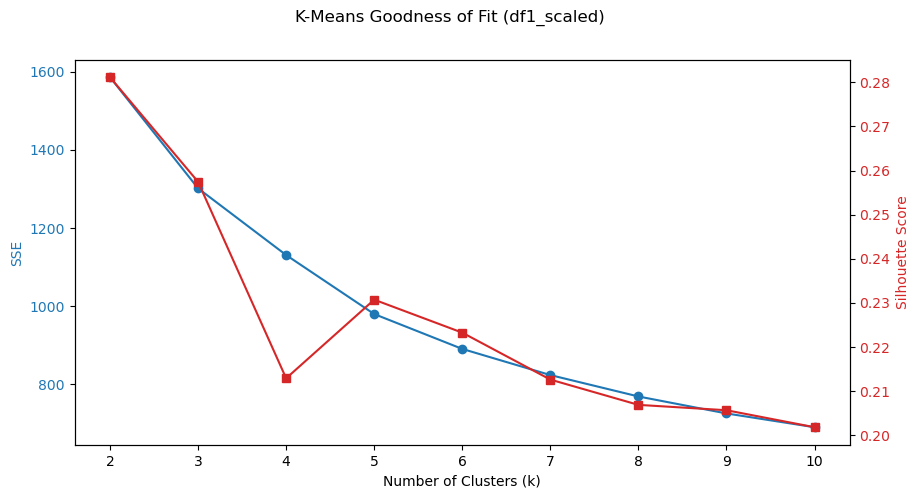

Optimal k (Elbow Method - SSE) for df1_scaled: 3
Optimal k (Silhouette Score) for df1_scaled: 2


c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:14

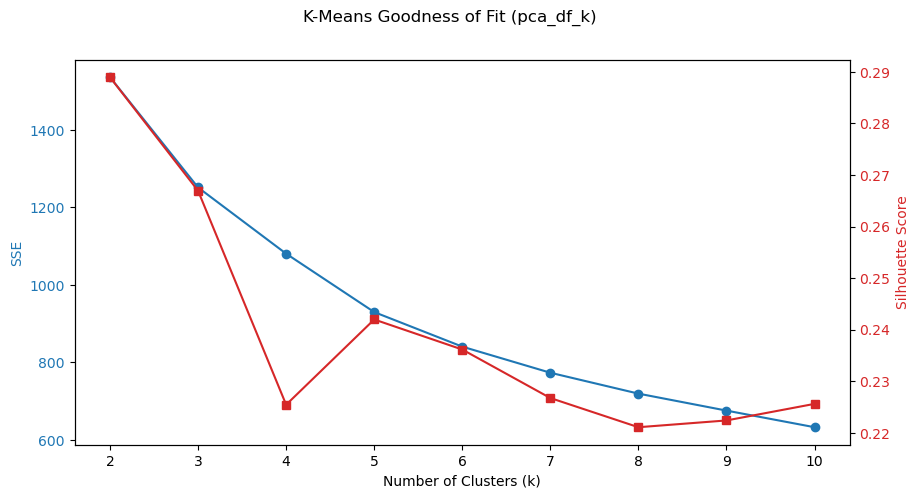

Optimal k (Elbow Method - SSE) for pca_df_k: 3
Optimal k (Silhouette Score) for pca_df_k: 2


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca_k = PCA(n_components=4)  # 4 gewählt
pca_data_k = pca_k.fit_transform(df1_scaled)

# Create a DataFrame with the PCA results
pca_df_k = pd.DataFrame(pca_data_k, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Funktion zur Durchführung von K-Means und Berechnung der Metriken
def kmeans_analysis(data, name):
    sse = []  # Sum of Squared Errors (SSE)
    silhouette_scores = []  # Silhouette-Score
    k_range = range(2, 11)  # k = 2 bis 10 (k=1 hat keinen Sinn für Silhouette)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        
        # Berechnung der Metriken
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, cluster_labels))

    # Visualisierung der Goodness-of-Fit-Metriken
    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('SSE', color='tab:blue')
    ax1.plot(k_range, sse, marker='o', linestyle='-', color='tab:blue', label='SSE')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Silhouette Score', color='tab:red')
    ax2.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='tab:red', label='Silhouette Score')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.suptitle(f'K-Means Goodness of Fit ({name})')
    plt.show()

    # Bestes k bestimmen
    optimal_k_sse = k_range[np.argmin(np.diff(sse)) + 1]  # Elbow-Methode
    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]  # Bestes Silhouette-Score

    print(f"Optimal k (Elbow Method - SSE) for {name}: {optimal_k_sse}")
    print(f"Optimal k (Silhouette Score) for {name}: {optimal_k_silhouette}")

# K-Means auf df1_scaled
kmeans_analysis(df1_scaled, "df1_scaled")

# K-Means auf pca_df_k
kmeans_analysis(pca_df_k, "pca_df_k")

c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(



=== Cluster Overview for df1_scaled ===
Cluster sizes:
Cluster
0    198
1    317
2    214
Name: count, dtype: int64

Mean values per cluster:
          Glucose       BMI  BloodPressure  Pregnancies       Age  \
Cluster                                                             
0        1.287241  0.213105       0.426351     0.291147  0.277441   
1       -0.524467 -0.659968      -0.669113     0.190573  0.138381   
2       -0.414101  0.780444       0.596688     0.222100  0.210358   

         SkinThickness   Insulin  DiabetesPedigreeFunction  
Cluster                                                     
0             0.448008  0.350252                  0.223335  
1             0.321969  0.174632                  0.199621  
2             0.510069  0.224803                  0.207724  



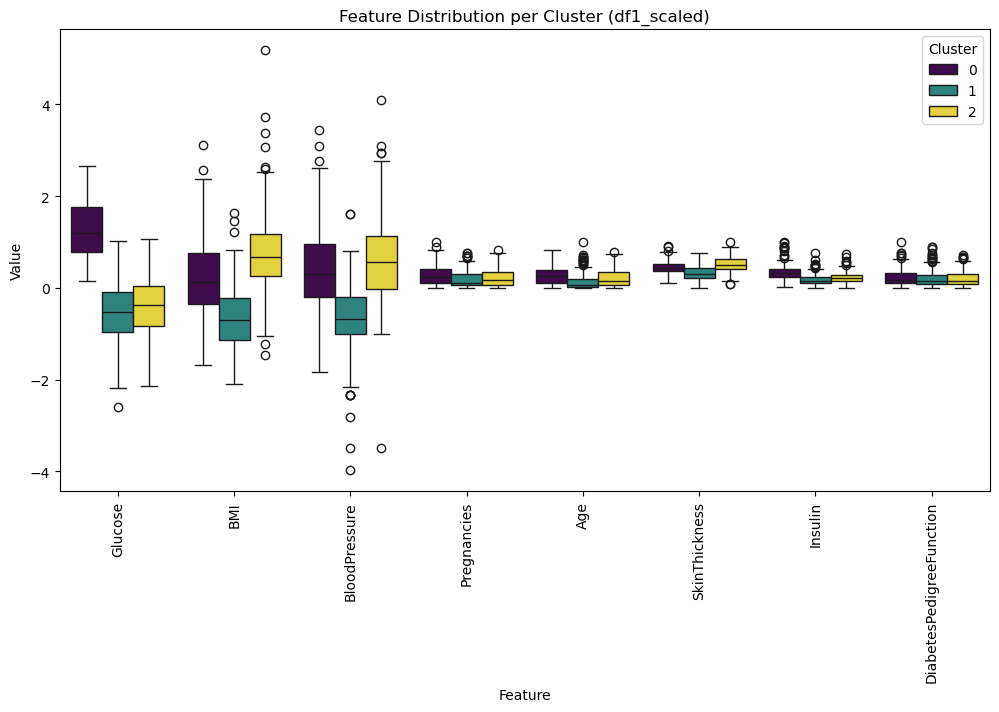

c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(



=== Cluster Overview for pca_df_k ===
Cluster sizes:
Cluster
0    199
1    317
2    213
Name: count, dtype: int64

Mean values per cluster:
              PC1       PC2       PC3       PC4
Cluster                                        
0        1.088243  0.842832 -0.058286  0.016424
1       -1.081612  0.070563 -0.009564 -0.008993
2        0.593007 -0.892451  0.068689 -0.001960



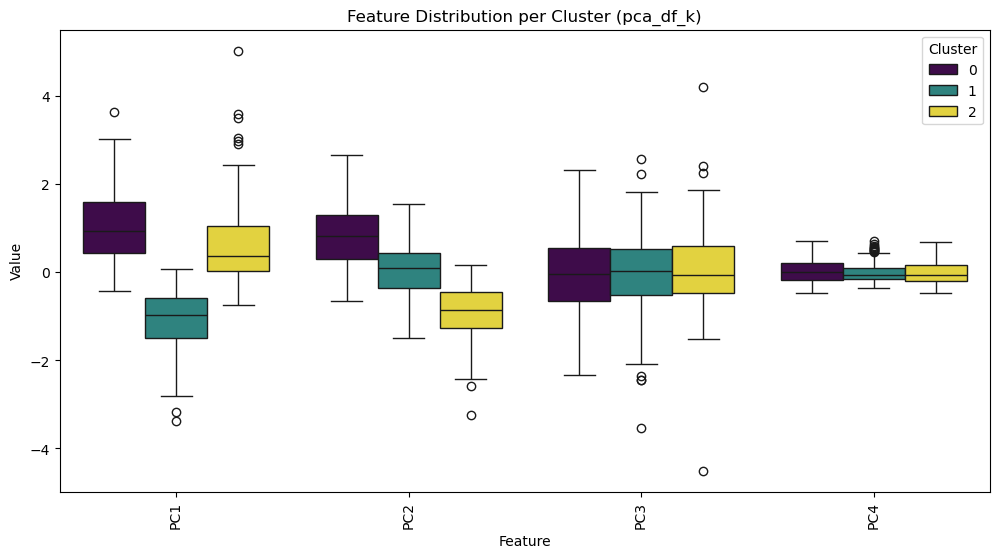

In [16]:
#2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Falls du das beste k bereits bestimmt hast, setze hier die Werte ein:
optimal_k_df1 = 3  # Beispielwert, ersetze mit deinem optimalen k für df1_scaled
optimal_k_pca = 3  # Beispielwert, ersetze mit deinem optimalen k für pca_df_k

# Funktion zur Durchführung von K-Means und Erstellung einer Cluster-Übersicht
def cluster_overview(data, name, optimal_k):
    # K-Means Clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    data_with_clusters = data.copy()
    data_with_clusters["Cluster"] = kmeans.fit_predict(data)
    
    # Deskriptive Statistik pro Cluster
    cluster_summary = data_with_clusters.groupby("Cluster").mean()
    cluster_size = data_with_clusters["Cluster"].value_counts().sort_index()
    
    # Ausgabe der Cluster-Übersicht
    print(f"\n=== Cluster Overview for {name} ===")
    print(f"Cluster sizes:\n{cluster_size}\n")
    print(f"Mean values per cluster:\n{cluster_summary}\n")

    # Visualisierung: Boxplot für die wichtigsten Merkmale
    plt.figure(figsize=(12, 6))
    melted_df = data_with_clusters.melt(id_vars=["Cluster"], var_name="Feature", value_name="Value")
    sns.boxplot(x="Feature", y="Value", hue="Cluster", data=melted_df, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f"Feature Distribution per Cluster ({name})")
    plt.legend(title="Cluster")
    plt.show()

# Cluster-Übersicht für df1_scaled
cluster_overview(df1_scaled, "df1_scaled", optimal_k_df1)

# Cluster-Übersicht für pca_df_k
cluster_overview(pca_df_k, "pca_df_k", optimal_k_pca)


K-Means for normalized data set k=[1-10]


c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:14

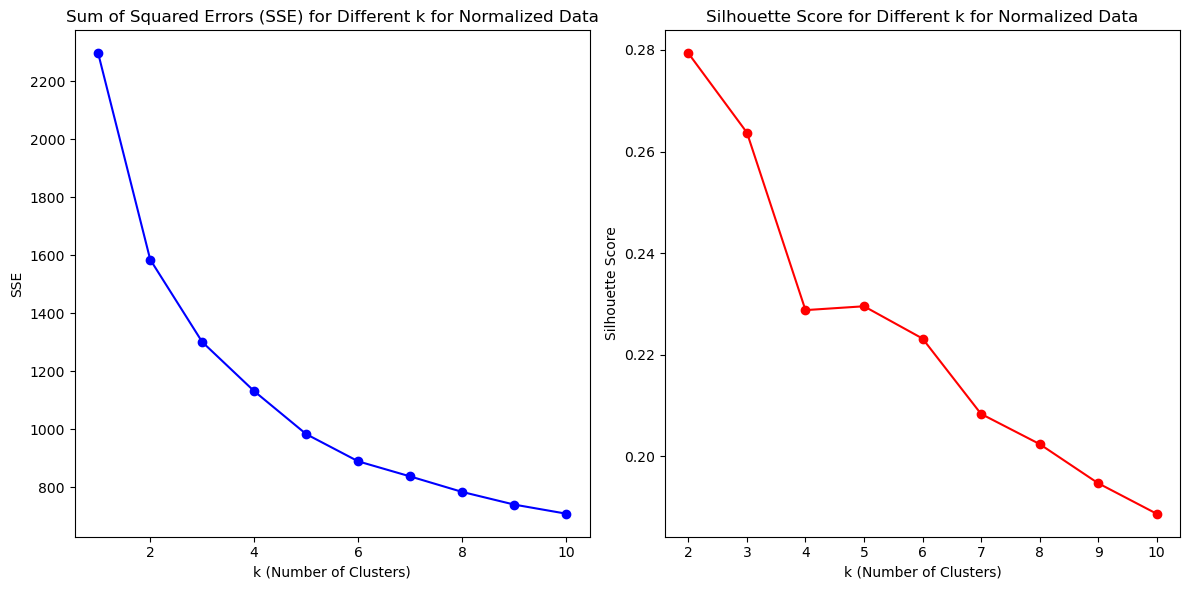

K-Means for normalized data set k=[1-10]


c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\maxwi\anaconda3\envs\aa_tuesday\lib\site-packages\sklearn\cluster\_kmeans.py:14

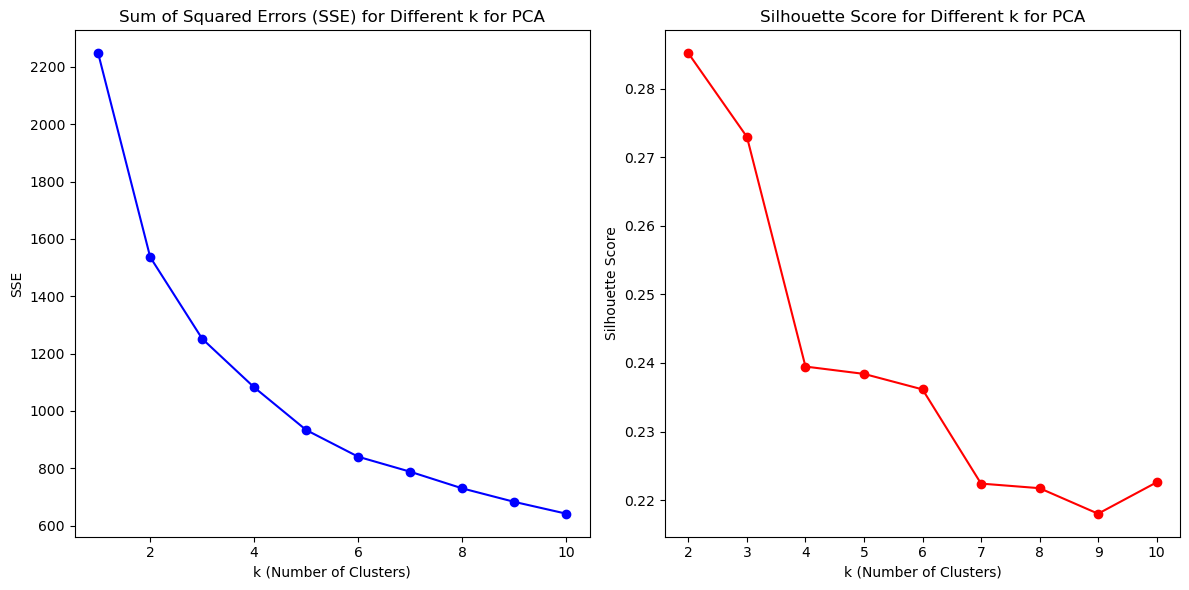

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import adjusted_rand_score

pca_k = PCA(n_components=4)  # 4 gewählt
pca_data_k = pca_k.fit_transform(df1_scaled)

# Create a DataFrame with the PCA results
pca_df_k = pd.DataFrame(pca_data_k, columns=['PC1', 'PC2', 'PC3', 'PC4'])

###K-Means for Normalized data set###
print('K-Means for normalized data set k=[1-10]')
# Loop through k from 1 to 10 for K-Means clustering
sse = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_scaled)  # For original data
    sse.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    if k > 1:  # Silhouette Score is not defined for k=1
        silhouette_scores.append(silhouette_score(df1_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(None)

# Plot SSE and Silhouette Score for different values of k
plt.figure(figsize=(12, 6))

# Plot for SSE
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), sse, marker='o', color='b')
plt.title('Sum of Squared Errors (SSE) for Different k for Normalized Data')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('SSE')

# Plot for Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores[1:], marker='o', color='r')  # Skip None for k=1
plt.title('Silhouette Score for Different k for Normalized Data')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

###K-Means for PCA###
print('K-Means for normalized data set k=[1-10]')
sse = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df_k)  # For original data
    sse.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    if k > 1:  # Silhouette Score is not defined for k=1
        silhouette_scores.append(silhouette_score(pca_df_k, kmeans.labels_))
    else:
        silhouette_scores.append(None)

# Plot SSE and Silhouette Score for different values of k
plt.figure(figsize=(12, 6))

# Plot for SSE
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), sse, marker='o', color='b')
plt.title('Sum of Squared Errors (SSE) for Different k for PCA')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('SSE')

# Plot for Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores[1:], marker='o', color='r')  # Skip None for k=1
plt.title('Silhouette Score for Different k for PCA')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



In [ ]:
##########################################################
optimal_k = 3  # Replace with the optimal number from your analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataframe
df1['Cluster'] = kmeans.labels_

# Display centroids of clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df1.columns)  # Exclude the 'Cluster' column
print("Cluster Centroids:")
print(centroids)

# Summary of each cluster
cluster_summary = df1.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)
# Assuming 'outcome' is the name of your outcome column


# If you have an outcome variable, compare it with the cluster labels
outcome = df1['Outcome']  # Replace with your actual outcome column
ari_score = adjusted_rand_score(outcome, df1['Cluster'])

print(f"Adjusted Rand Index (ARI) between clusters and outcome: {ari_score}")
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df1['Cluster'], cmap='viridis')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

#### Task Kohonen Self-Organizing Maps

Perform the following tasks for the original (but normalized) variables.
1) Train a SOM on the input variables.
2) Visualize the SOM using U-matrix and highlighting the neighbourhood distance. Calculate the Quantization Error (average Euclidean of each data point and its BMU).
3) Vary the SOM parameters. How do changes in grid size,  learning rate, sigma (spread of the neighbourhood function) and topology affect the U-matrix/Quantization Error? Which parameters do you see as the best fit for the data?
4) Based on your preferred parameters, Label the data points by the cluster assignment of their BMU.
5) Compare if the clusters align with the outcome.
6) Compare if the clusters align with the two versions of clusters (original data & dimensionality-reduced data) created by K-Means Clustering.

Cluster-Zuordnung:
   SOM_Cluster
0            2
1            0
2            2
3            0
4            0


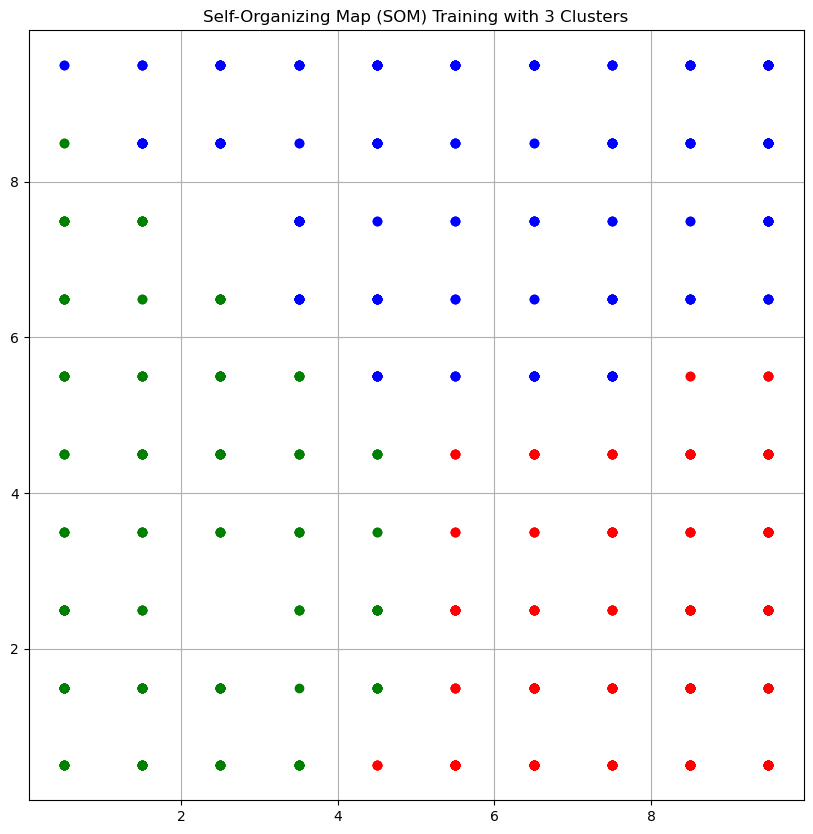

In [33]:
import numpy as np
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Daten standardisieren
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# SOM-Parameter definieren
som_size = (10, 10)  # 10x10 Gitter
som = MiniSom(som_size[0], som_size[1], scaled_data.shape[1], sigma=1.0, learning_rate=0.5)

# SOM initialisieren und trainieren
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 1000)

# Cluster-Labels basierend auf den BMUs (Best Matching Units) zuweisen
bmu_labels = np.array([som.winner(x) for x in scaled_data])

# K-Means-Clustering auf BMU-Koordinaten mit 3 Clustern
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(bmu_labels)
df1['SOM_Cluster'] = kmeans.labels_

# Ergebnisse anzeigen
print("Cluster-Zuordnung:")
print(df1[['SOM_Cluster']].head())

# Visualisierung der Cluster auf der SOM
plt.figure(figsize=(10, 10))
colors = ['red', 'blue', 'green']  # Definiere Farben für 3 Cluster
for i, x in enumerate(scaled_data):
    winner = som.winner(x)
    cluster_idx = int(df1.iloc[i]['SOM_Cluster'])  # Sicherstellen, dass der Index ein Integer ist
    plt.scatter(winner[0] + 0.5, winner[1] + 0.5, marker='o', color=colors[cluster_idx])
plt.title("Self-Organizing Map (SOM) Training with 3 Clusters")
plt.grid()
plt.show()

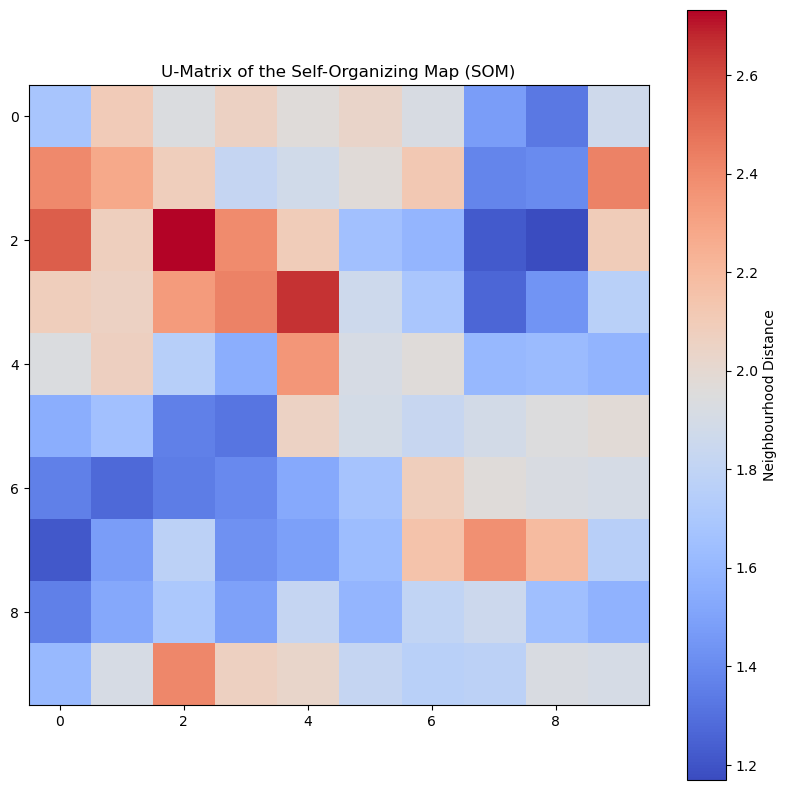

Quantization Error: 1.3348


In [27]:
import numpy as np
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Daten standardisieren
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# SOM-Parameter definieren
som_size = (10, 10)  # 10x10 Gitter
som = MiniSom(som_size[0], som_size[1], scaled_data.shape[1], sigma=1.0, learning_rate=0.5)

# SOM initialisieren und trainieren
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 1000)  # 1000 Iterationen

# Berechnung der U-Matrix
u_matrix = np.zeros((som_size[0], som_size[1]))
for x in range(som_size[0]):
    for y in range(som_size[1]):
        neighbors = []
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            if 0 <= x + dx < som_size[0] and 0 <= y + dy < som_size[1]:
                neighbors.append(som._weights[x + dx, y + dy])
        u_matrix[x, y] = np.mean([np.linalg.norm(som._weights[x, y] - n) for n in neighbors])

# U-Matrix visualisieren
plt.figure(figsize=(10, 10))
plt.imshow(u_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Neighbourhood Distance')
plt.title("U-Matrix of the Self-Organizing Map (SOM)")
plt.show()

# Quantisierungsfehler berechnen
quantization_error = np.mean([np.linalg.norm(x - som._weights[som.winner(x)]) for x in scaled_data])
print(f"Quantization Error: {quantization_error:.4f}")

Training SOM with size=(5, 5), learning_rate=0.1, sigma=0.5


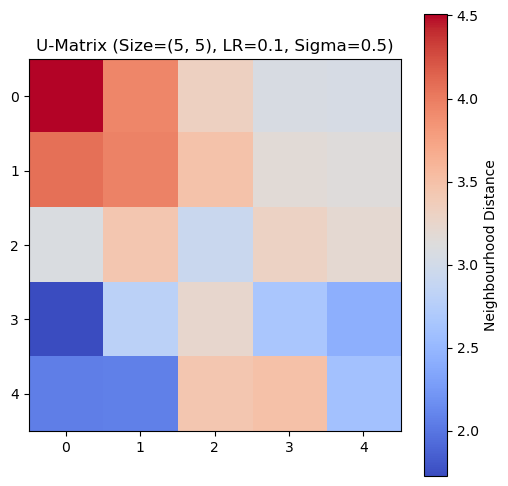

Quantization Error: 1.7203

Training SOM with size=(5, 5), learning_rate=0.1, sigma=1.0


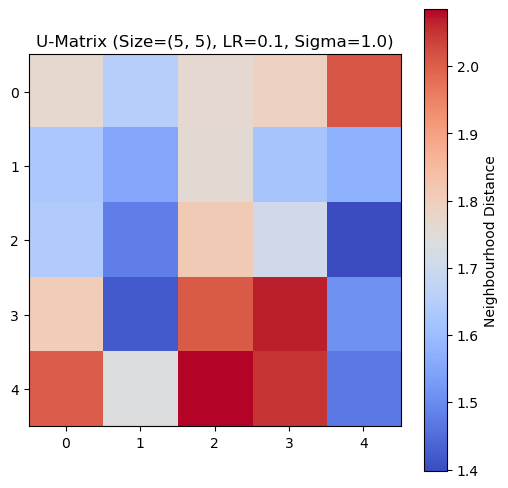

Quantization Error: 1.7849

Training SOM with size=(5, 5), learning_rate=0.1, sigma=2.0


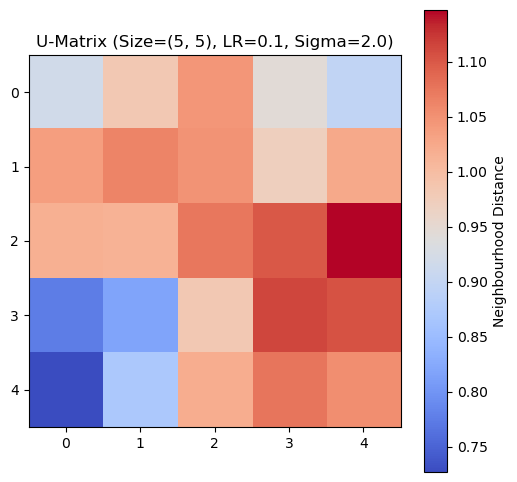

Quantization Error: 1.9258

Training SOM with size=(5, 5), learning_rate=0.5, sigma=0.5


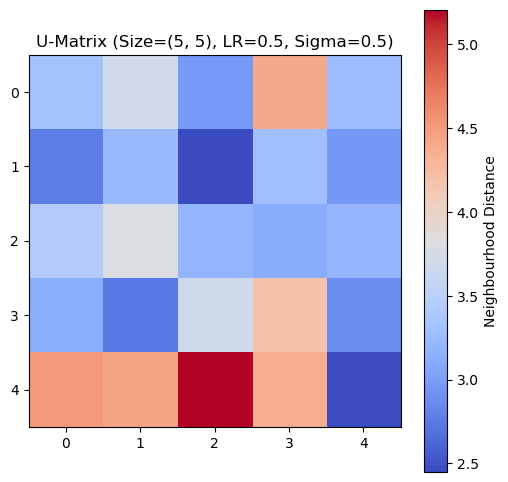

Quantization Error: 1.7408

Training SOM with size=(5, 5), learning_rate=0.5, sigma=1.0


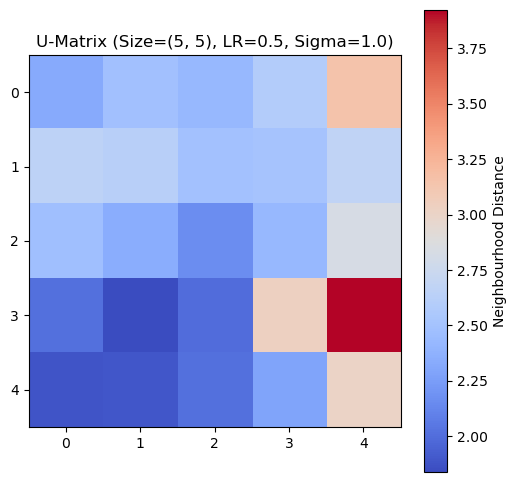

Quantization Error: 1.7410

Training SOM with size=(5, 5), learning_rate=0.5, sigma=2.0


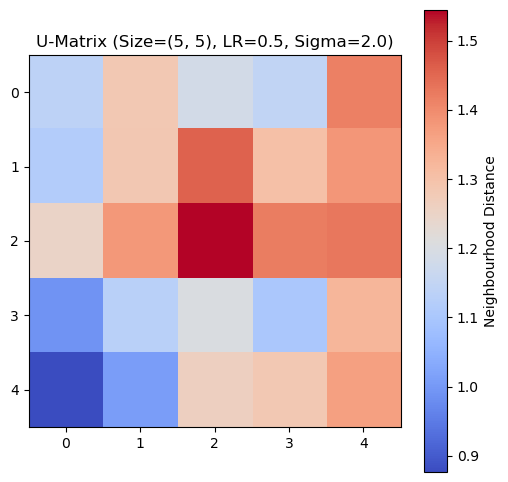

Quantization Error: 1.9280

Training SOM with size=(5, 5), learning_rate=0.9, sigma=0.5


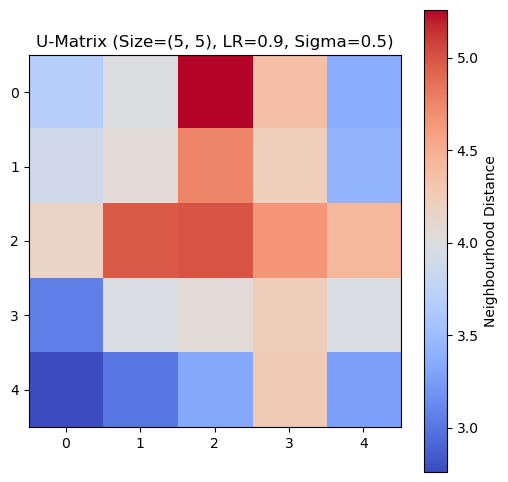

Quantization Error: 1.7890

Training SOM with size=(5, 5), learning_rate=0.9, sigma=1.0


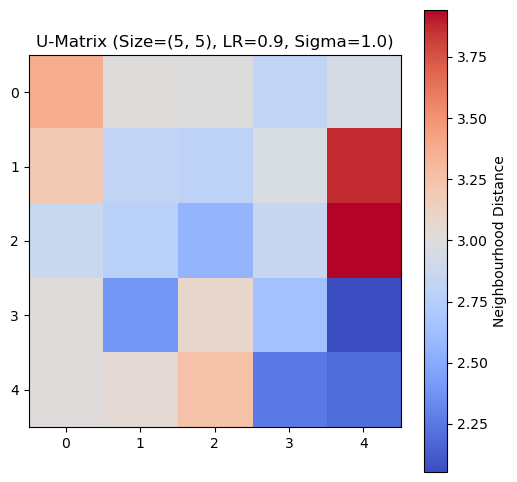

Quantization Error: 1.7839

Training SOM with size=(5, 5), learning_rate=0.9, sigma=2.0


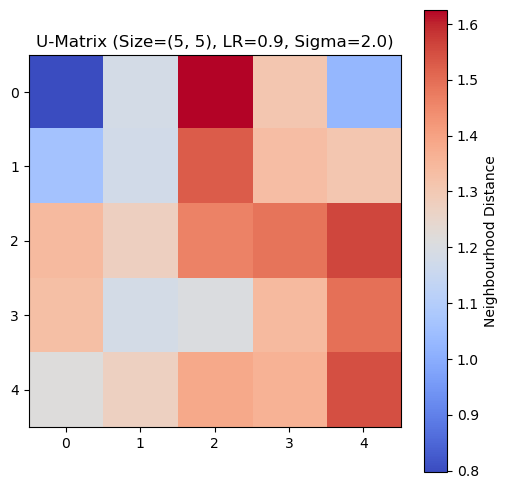

Quantization Error: 1.9557

Training SOM with size=(10, 10), learning_rate=0.1, sigma=0.5


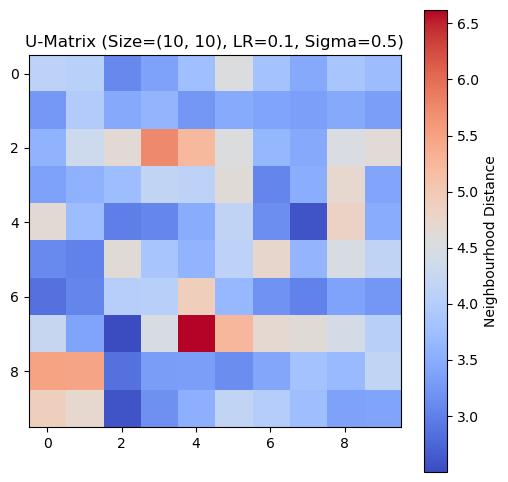

Quantization Error: 1.3439

Training SOM with size=(10, 10), learning_rate=0.1, sigma=1.0


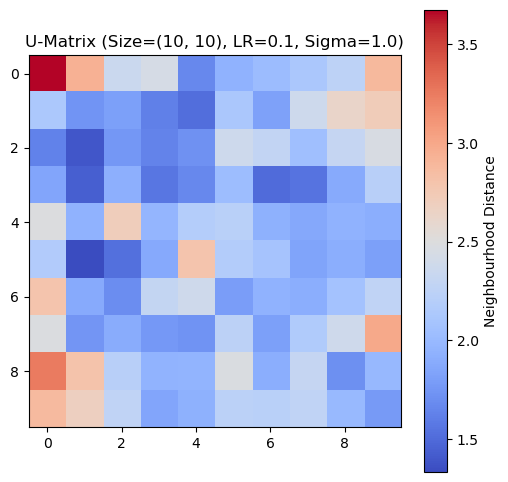

Quantization Error: 1.5259

Training SOM with size=(10, 10), learning_rate=0.1, sigma=2.0


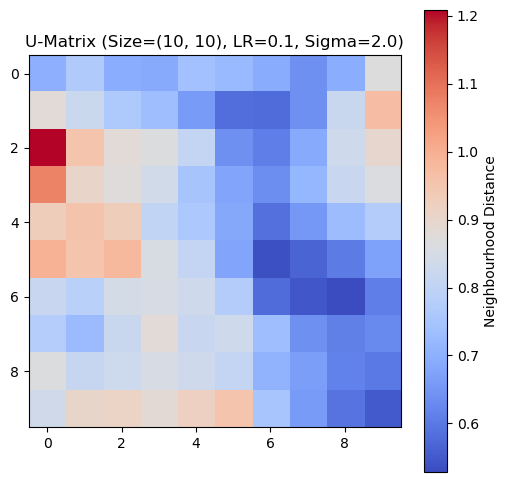

Quantization Error: 1.6666

Training SOM with size=(10, 10), learning_rate=0.5, sigma=0.5


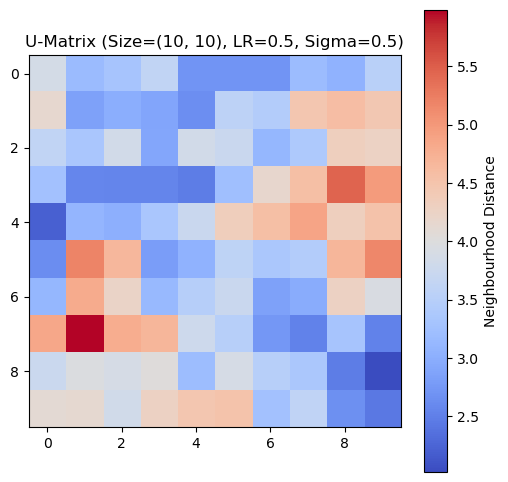

Quantization Error: 1.2789

Training SOM with size=(10, 10), learning_rate=0.5, sigma=1.0


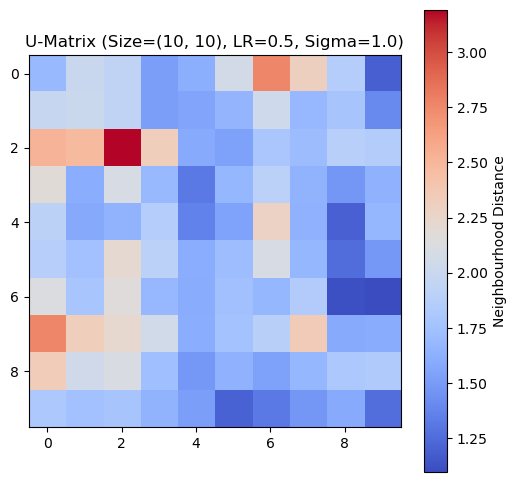

Quantization Error: 1.3734

Training SOM with size=(10, 10), learning_rate=0.5, sigma=2.0


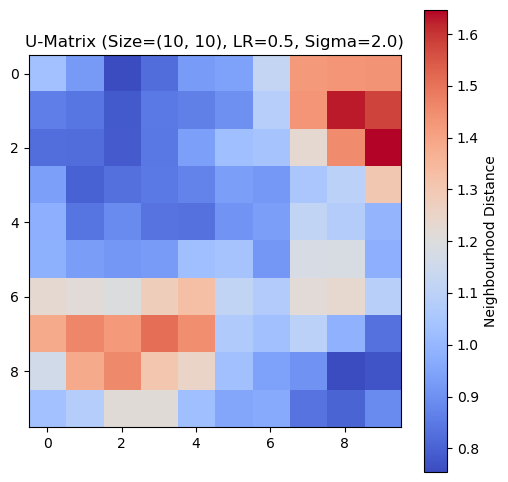

Quantization Error: 1.5227

Training SOM with size=(10, 10), learning_rate=0.9, sigma=0.5


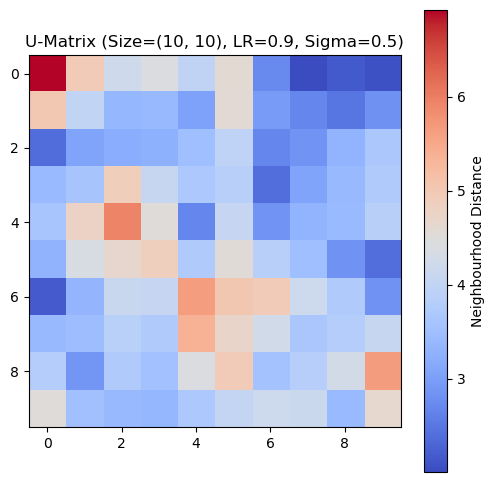

Quantization Error: 1.2916

Training SOM with size=(10, 10), learning_rate=0.9, sigma=1.0


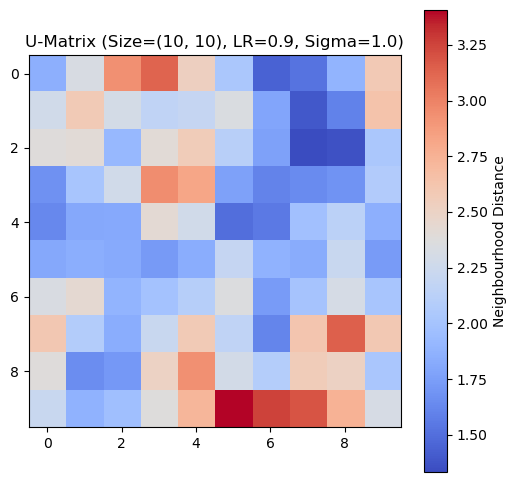

Quantization Error: 1.3182

Training SOM with size=(10, 10), learning_rate=0.9, sigma=2.0


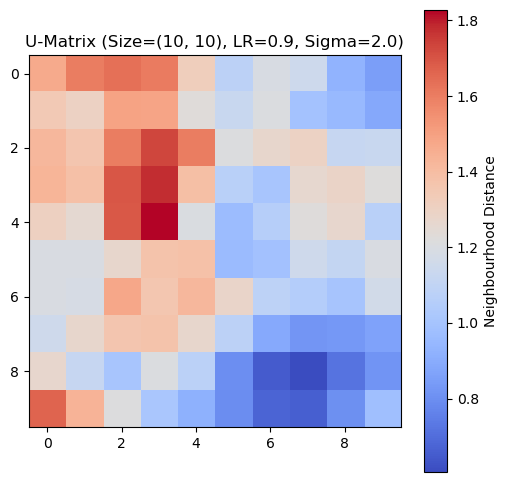

Quantization Error: 1.5296

Training SOM with size=(20, 20), learning_rate=0.1, sigma=0.5


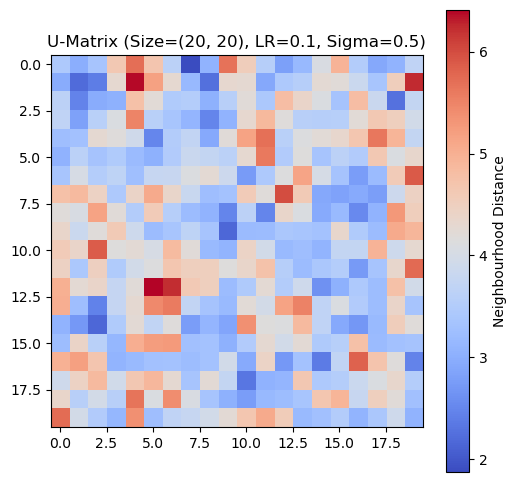

Quantization Error: 0.7846

Training SOM with size=(20, 20), learning_rate=0.1, sigma=1.0


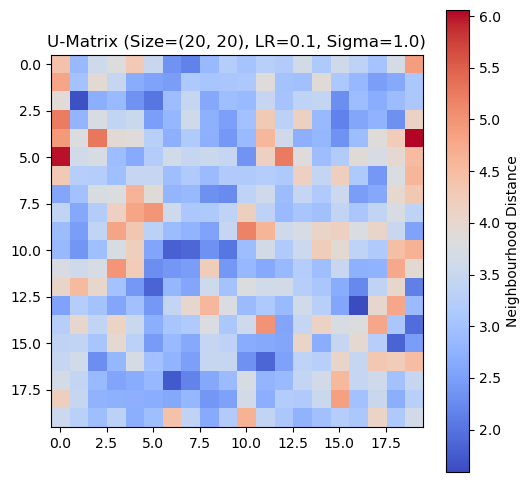

Quantization Error: 0.9390

Training SOM with size=(20, 20), learning_rate=0.1, sigma=2.0


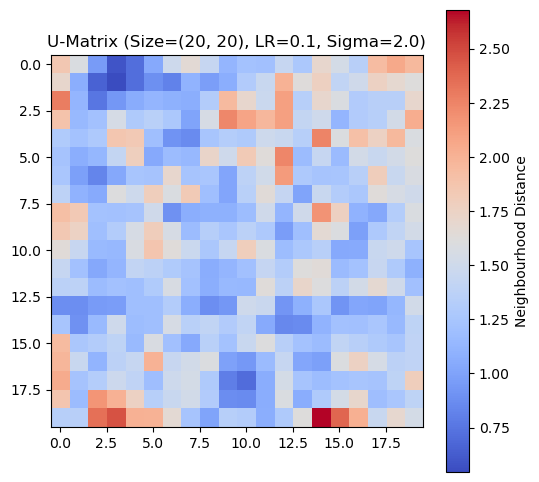

Quantization Error: 1.4596

Training SOM with size=(20, 20), learning_rate=0.5, sigma=0.5


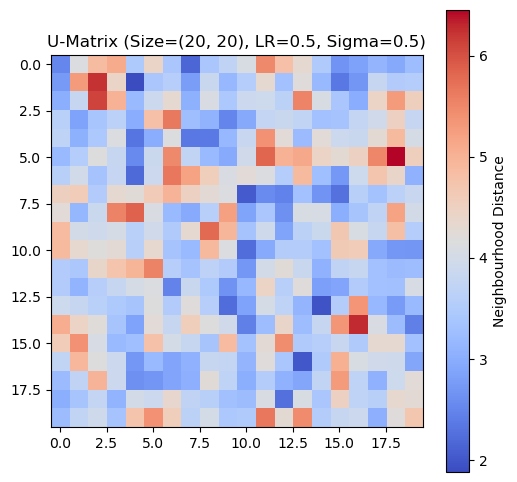

Quantization Error: 0.7356

Training SOM with size=(20, 20), learning_rate=0.5, sigma=1.0


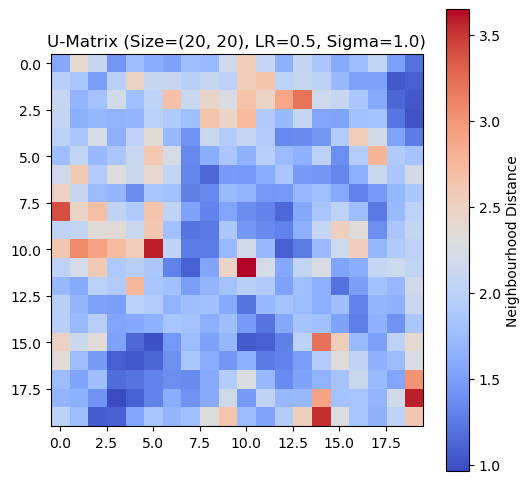

Quantization Error: 1.0791

Training SOM with size=(20, 20), learning_rate=0.5, sigma=2.0


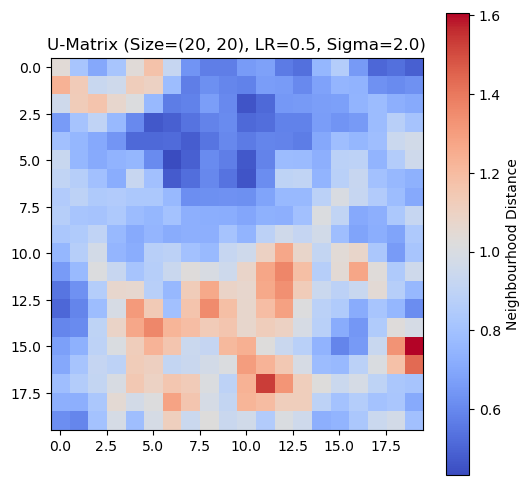

Quantization Error: 1.1986

Training SOM with size=(20, 20), learning_rate=0.9, sigma=0.5


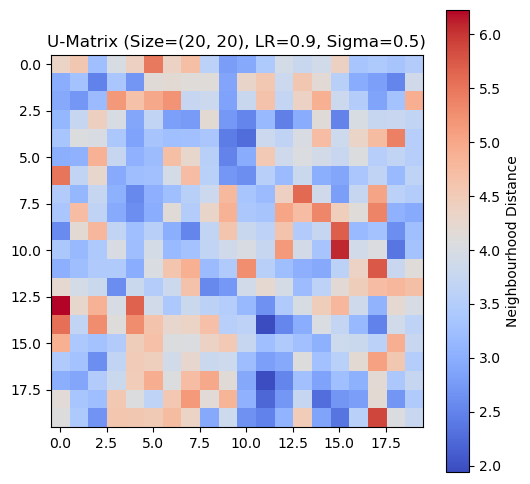

Quantization Error: 0.7075

Training SOM with size=(20, 20), learning_rate=0.9, sigma=1.0


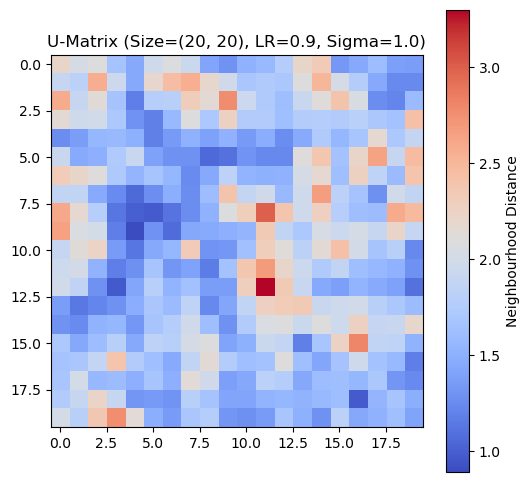

Quantization Error: 0.9758

Training SOM with size=(20, 20), learning_rate=0.9, sigma=2.0


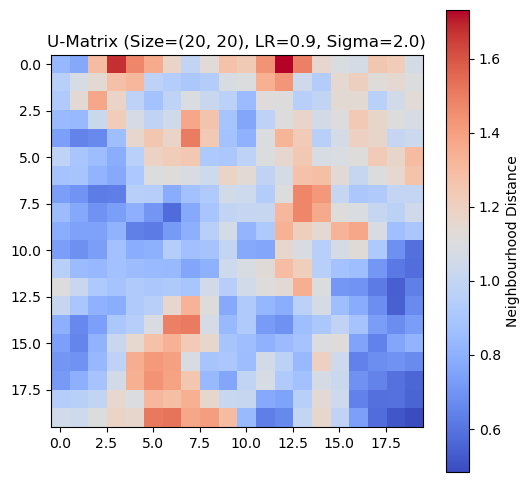

Quantization Error: 1.1441

Best parameters: Size=(20, 20), Learning Rate=0.9, Sigma=0.5, Quantization Error=0.7075


In [28]:
import numpy as np
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Daten standardisieren
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Verschiedene SOM-Parameter testen
som_sizes = [(5, 5), (10, 10), (20, 20)]  # Unterschiedliche Gittergrößen
learning_rates = [0.1, 0.5, 0.9]  # Unterschiedliche Lernraten
sigmas = [0.5, 1.0, 2.0]  # Unterschiedliche Nachbarschaftsbreiten

results = []

for som_size in som_sizes:
    for lr in learning_rates:
        for sigma in sigmas:
            print(f"Training SOM with size={som_size}, learning_rate={lr}, sigma={sigma}")
            som = MiniSom(som_size[0], som_size[1], scaled_data.shape[1], sigma=sigma, learning_rate=lr)
            som.random_weights_init(scaled_data)
            som.train_random(scaled_data, 1000)  # 1000 Iterationen

            # Berechnung der U-Matrix
            u_matrix = np.zeros((som_size[0], som_size[1]))
            for x in range(som_size[0]):
                for y in range(som_size[1]):
                    neighbors = []
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        if 0 <= x + dx < som_size[0] and 0 <= y + dy < som_size[1]:
                            neighbors.append(som._weights[x + dx, y + dy])
                    u_matrix[x, y] = np.mean([np.linalg.norm(som._weights[x, y] - n) for n in neighbors])

            # U-Matrix visualisieren
            plt.figure(figsize=(6, 6))
            plt.imshow(u_matrix, cmap='coolwarm', interpolation='nearest')
            plt.colorbar(label='Neighbourhood Distance')
            plt.title(f"U-Matrix (Size={som_size}, LR={lr}, Sigma={sigma})")
            plt.show()

            # Quantisierungsfehler berechnen
            quantization_error = np.mean([np.linalg.norm(x - som._weights[som.winner(x)]) for x in scaled_data])
            print(f"Quantization Error: {quantization_error:.4f}\n")

            # Ergebnisse speichern
            results.append((som_size, lr, sigma, quantization_error))

# Beste Parameter basierend auf dem geringsten Quantisierungsfehler finden
best_params = min(results, key=lambda x: x[3])
print(f"Best parameters: Size={best_params[0]}, Learning Rate={best_params[1]}, Sigma={best_params[2]}, Quantization Error={best_params[3]:.4f}")

Cluster-Zuordnung:
   SOM_Cluster
0            1
1            2
2            1
3            1
4            1


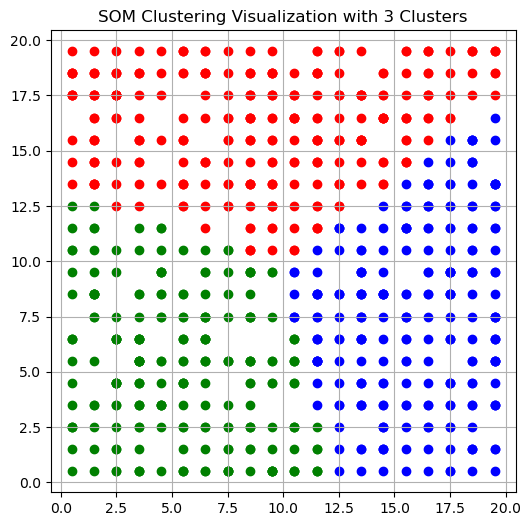

In [32]:
import numpy as np
import pandas as pd
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Daten standardisieren
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Beste SOM-Parameter basierend auf vorheriger Analyse
best_som_size = best_params[0]
best_lr = best_params[1]
best_sigma = best_params[2]

# SOM mit den besten Parametern trainieren
som = MiniSom(best_som_size[0], best_som_size[1], scaled_data.shape[1], sigma=best_sigma, learning_rate=best_lr)
som.random_weights_init(scaled_data)
som.train_random(scaled_data, 1000)

# Cluster-Labels basierend auf den BMUs (Best Matching Units) zuweisen
bmu_labels = np.array([som.winner(x) for x in scaled_data])

# K-Means-Clustering auf BMU-Koordinaten mit 3 Clustern
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(bmu_labels)
df1['SOM_Cluster'] = kmeans.labels_

# Ergebnisse anzeigen
print("Cluster-Zuordnung:")
print(df1[['SOM_Cluster']].head())

# Visualisierung der Cluster auf der SOM
plt.figure(figsize=(6, 6))
colors = ['red', 'blue', 'green']  # Definiere Farben für 3 Cluster
for i, x in enumerate(scaled_data):
    winner = som.winner(x)
    cluster_idx = int(df1.iloc[i]['SOM_Cluster'])  # Sicherstellen, dass der Index ein Integer ist
    plt.scatter(winner[0] + 0.5, winner[1] + 0.5, marker='o', color=colors[cluster_idx])
plt.title("SOM Clustering Visualization with 3 Clusters")
plt.grid()
plt.show()